In [631]:
import numpy as np
import matplotlib.pyplot as plt

1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano.

- Realizar un diagrama 3D de los puntos generados aleatoriamente.


Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados.

In [632]:
val_max = 82
num_datos = 444

Definiendo la función:

In [633]:
x1 = np.random.rand(num_datos)*val_max
x2 = np.random.rand(num_datos)*val_max

y = lambda x1, x2: 2.1*x1 - 3.1*x2

In [634]:
y_ = y(x1, x2)

**Graficando**

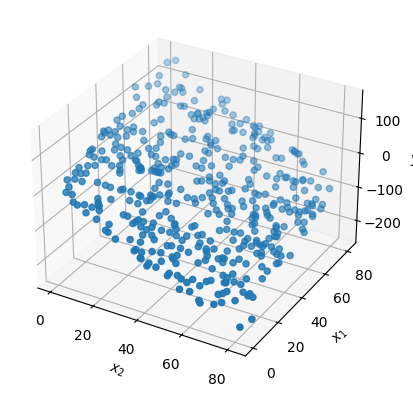

In [635]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x2, x1, y_)
ax.set_xlabel(r'$x_2$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel(r'$y$')
plt.show()

2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.

In [636]:
thetas = np.random.rand(3)*5 - 2.5

3. Construir la matrix $X$ con dimensiones $(n+1, m)$, $m$ es el numero de datos de entrenamiento y $n$ el número de caracteristicas.

In [637]:
X = np.ones((3, num_datos))
X[1, :] = x1
X[2, :] = x2

4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):

* $h = \Theta^T X$

In [638]:
def h(thetas, X):
  return thetas.T @ X

* $\Lambda = h - Y$

In [639]:
def Lambda(thetas, X, y):
  Lambda = h(thetas, X) - y(X[1, :], X[2, :])
  return Lambda

* $\Lambda_* = (h-Y)^2$

* $\Lambda = [\Lambda_1, ...,  \Lambda_m]$

* $J = \frac{1}{2m}\sum_i^m\Lambda_i^2$

In [640]:
def J(thetas, X, y):
  Lambda_ = Lambda(thetas, X, y)

  num_datos = len(X[1, :])
  J_ = 1/(2*num_datos) * np.sum(Lambda_**2)

  return J_

5. Aplicar el gradiente descendente:
  - Encontrar el gradiente. $\nabla J = \Lambda X.T$

In [641]:
def DJ(Lambda, X):
  return Lambda @ X.T

  - Actualizar los nuevos parametros: $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$

  6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano.

In [642]:
eps = 1e-4
alpha = 0.000001 # con un alpha mayor el descenso explota

In [643]:
thetas_ = thetas.copy()
while True:
  Lambda_ = Lambda(thetas_, X, y)
  thetas_ = thetas_ - alpha*DJ(Lambda_, X)
  if J(thetas_, X, y) < eps:
    break

Los parámetros obtenidos fueron:

In [644]:
thetas_

array([-0.0357074 ,  2.1003614 , -3.09962025])

7. Reescribir su código como una clase:

In [645]:
class MultilinearRegresion():
  def __init__(self, X, y, alpha=0.0000001, eps=1e-4):
    """
      Inicializa la clase de Regresión Multilineal.
      Args:
        X: Matriz de características con dimensiones (n+1, m).
        y: Vector de valores objetivo con dimensiones (m,).
        alpha: Tasa de aprendizaje para el descenso de gradiente.
        num_iterations: Número de iteraciones para el descenso de gradiente.
    """
    self.X = X
    self.y = y
    self.alpha = alpha
    self.num_iterations = num_iterations
    self.num_features = X.shape[0] - 1  # n
    self.num_samples = X.shape[1]       # m
    self.theta = np.random.rand(self.num_features + 1) * 5 - 2.5

  def model(self):
    """Calcula h = theta^T * X"""
    self.h = self.theta.T @ self.X
    return self.h

  def costo(self):
    """Calcula la función de costo J"""
    Lambda_ = self.h - self.y(self.X[1, :], self.X[2, :])
    self.J = 1 / (2 * self.num_samples) * np.sum(Lambda_**2)
    return self.J

  def update_params(self):
    """Realiza un paso del descenso de gradiente"""
    Lambda_ = self.h - self.y(self.X[1, :], self.X[2, :])
    gradient = Lambda_ @ self.X.T
    self.theta = self.theta - self.alpha * gradient

  def fit(self):
    """Ejecuta el descenso de gradiente para encontrar los parámetros"""
    while True:
      self.model()
      self.update_params()
      if self.costo() < eps:
        break

    print("Parámetros optimizados:", self.theta)

Probando la clase:

In [646]:
MultilinearRegresion(X, y).fit()

Parámetros optimizados: [ 0.02169121  2.09941275 -3.09988227]
